# Title: Data Analyst Approach to Customer Churn Prediction
##############################
## Telco Customer Churn Feature Engineering
##############################

## TASK 1: EXPLORATORY DATA ANALYSIS (EDA)

### Step 1: Overview
Before developing the machine learning model to predict customer churn, it is crucial to conduct exploratory data analysis (EDA) to gain insights into the dataset.

### Step 2: Capture Numeric and Categorical Variables
Identify and categorize the variables as numeric or categorical.

### Step 3: Analysis of Numeric and Categorical Variables
Perform a detailed analysis of both numeric and categorical variables. Explore the distribution, summary statistics, and potential patterns or trends.

### Step 4: Target Variable Analysis
Analyze the target variable, 'Churn,' by examining its distribution across categorical variables and calculating the mean of numeric variables concerning the churn status.

### Step 5: Correlation Analysis
Conduct correlation analysis to understand relationships between numeric variables. This step is crucial for feature selection and identifying multicollinearity.

## TASK 2: FEATURE ENGINEERING

### Step 1: Handling Missing and Outlier Values
Implement necessary procedures to address missing values and outliers. This may involve imputation, removal, or other appropriate techniques.

### Step 2: Create New Variables
Explore opportunities to create new variables that might enhance the predictive power of the model. Consider interactions or transformations of existing features.

### Step 3: Encoding
Perform encoding for categorical variables using techniques such as one-hot encoding or label encoding to make them compatible with machine learning algorithms.

### Step 4: Model Creation
Develop a machine learning model for predicting customer churn. Choose appropriate algorithms, split the dataset into training and testing sets, and evaluate the model's performance using relevant metrics.

By systematically approaching these tasks, we aim to build a robust predictive model for identifying customers at risk of churning, providing valuable insights for proactive customer retention strategies.

In [1]:
# Download edilecek Kütüphaneler

!pip3 install catboost

#!pip install lightgbm
#!conda install lightgbm
#conda install -c conda-forge lightgbm : konsoldan yuklenecek
#Kernel i restart yapmak gerek

#Use conda install in Anaconda Powershell Prompt then use pip install

#conda install -c conda-forge xgboost
#pip install xgboost

In [2]:
!pip install cmake

In [3]:
!python3 --version
!pip3 --version

Python 3.11.4
pip 23.3.1 from /Users/cemila/anaconda3/lib/python3.11/site-packages/pip (python 3.11)


In [4]:
!pip3 install xgboost

In [5]:
!pip install 'pip<23.1'
!pip install \
    --no-binary lightgbm \
    --install-option='--nomp' \
    'lightgbm==3.3.2'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 2.5 MB/s eta 0:00:00a 0:00:010m
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
DEPRECATION: --install-option is deprecated because it forces pip to use the 'setup.py install' command which is itself deprecated. pip 23.1 will enforce this behaviour change. A possible replacement is to use --config-settings. Discussion can be found at https://github.com/pypa/pip/issues/11358
DEPRECATION: --no-binary currently disables reading from the cache of locally built wheels. In the future --no-binary will not influence the wheel cache. pip 23.1 will enforce this behaviour change. A possible replacement is to use the --no-cache-dir option. You can use the flag --use-feature=no-binary-enable-wheel-cache to test the upcoming behaviour. Dis

In [6]:
!pip install --upgrade pip
!pip install \
   --no-binary lightgbm \
   --config-settings=cmake.define.USE_OPENMP=OFF \
   'lightgbm>=4.0.0'

  Using cached pip-23.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
  Using cached lightgbm-4.1.0-py3-none-macosx_13_0_arm64.whl
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 3.3.2
    Uninstalling lightgbm-3.3.2:
      Successfully uninstalled lightgbm-3.3.2


In [7]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression  #1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier     #2
from sklearn.svm import SVC

from catboost import CatBoostClassifier       #3
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
# pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Uyarilari Kapat
pd.options.mode.chained_assignment = None

# TASK 1: EXPLORATORY DATA ANALYSIS (EDA)
## Step 1: Overview
Before developing the machine learning model to predict customer churn, it is crucial to conduct exploratory data analysis (EDA) to gain insights into the dataset.


In [8]:
df_ = pd.read_csv("Telco-Customer-Churn-Data.csv", delimiter = ';')
df_.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [9]:
df_.shape

(7043, 21)

### Special Task: Choosing Male Customers

In [10]:
df = df_[df_["gender"] == "Male"]
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.100,1949.4,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.150,3487.95,No


In [11]:
df.nunique()

customerID          3555
gender                 1
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1286
TotalCharges        3376
Churn                  2
dtype: int64

In [12]:
df = df.drop(["customerID", "gender"], axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3555 entries, 1 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     3555 non-null   int64  
 1   Partner           3555 non-null   object 
 2   Dependents        3555 non-null   object 
 3   tenure            3555 non-null   int64  
 4   PhoneService      3555 non-null   object 
 5   MultipleLines     3555 non-null   object 
 6   InternetService   3555 non-null   object 
 7   OnlineSecurity    3555 non-null   object 
 8   OnlineBackup      3555 non-null   object 
 9   DeviceProtection  3555 non-null   object 
 10  TechSupport       3555 non-null   object 
 11  StreamingTV       3555 non-null   object 
 12  StreamingMovies   3555 non-null   object 
 13  Contract          3555 non-null   object 
 14  PaperlessBilling  3555 non-null   object 
 15  PaymentMethod     3555 non-null   object 
 16  MonthlyCharges    3555 non-null   float64


In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3555 entries, 1 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     3555 non-null   int64  
 1   Partner           3555 non-null   object 
 2   Dependents        3555 non-null   object 
 3   tenure            3555 non-null   int64  
 4   PhoneService      3555 non-null   object 
 5   MultipleLines     3555 non-null   object 
 6   InternetService   3555 non-null   object 
 7   OnlineSecurity    3555 non-null   object 
 8   OnlineBackup      3555 non-null   object 
 9   DeviceProtection  3555 non-null   object 
 10  TechSupport       3555 non-null   object 
 11  StreamingTV       3555 non-null   object 
 12  StreamingMovies   3555 non-null   object 
 13  Contract          3555 non-null   object 
 14  PaperlessBilling  3555 non-null   object 
 15  PaymentMethod     3555 non-null   object 
 16  MonthlyCharges    3555 non-null   float64


In [16]:
# The 'Churn' variable should be expressed as 1 or 0.
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0 )

In [17]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
6,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.100,1949.400,0
9,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.150,3487.950,0


In [18]:
df.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        6
Churn               0
dtype: int64

In [19]:
summary = df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T
summary.astype(int).head()

,0.000,0.050,0.500,0.950,0.990,1.000
SeniorCitizen,0,0,0,1,1,1
tenure,0,1,29,72,72,72
MonthlyCharges,18,19,70,106,114,118
TotalCharges,18,45,1404,6922,8019,8684
Churn,0,0,0,1,1,1


## Step 2: Capture Numeric and Categorical Variables

In [20]:
for col in df.columns:
    print(col)

SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [21]:
[col for col in df.columns if df[col].dtypes == "O"]

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [22]:
#kategorik sütunlar
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]

In [23]:
# numerik sütunlar
num_cols = [col for col in df.columns if df[col].dtypes != "O"]

## Step 3: Analysis of Numeric and Categorical Variables

     Partner  Ratio
No      1841 51.786
Yes     1714 48.214


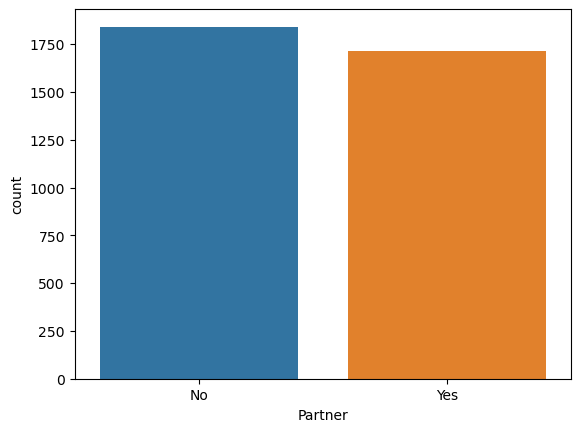

     Dependents  Ratio
No         2473 69.564
Yes        1082 30.436


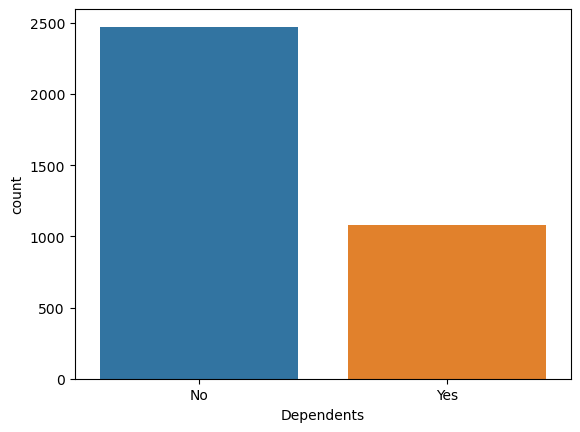

     PhoneService  Ratio
Yes          3204 90.127
No            351  9.873


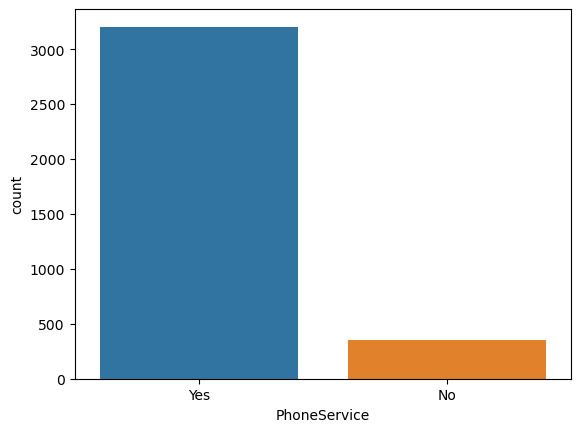

                  MultipleLines  Ratio
No                         1719 48.354
Yes                        1485 41.772
No phone service            351  9.873


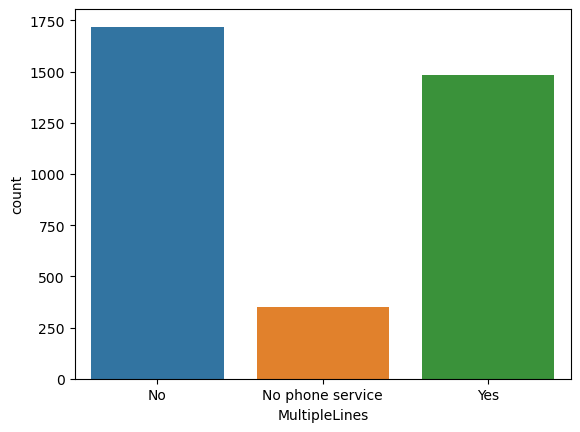

             InternetService  Ratio
Fiber optic             1543 43.404
DSL                     1233 34.684
No                       779 21.913


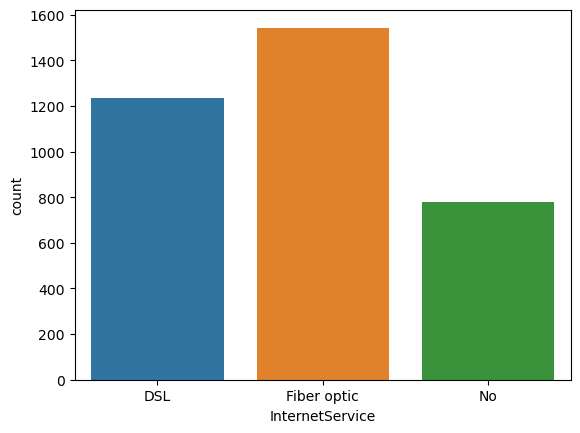

                     OnlineSecurity  Ratio
No                             1784 50.183
Yes                             992 27.904
No internet service             779 21.913


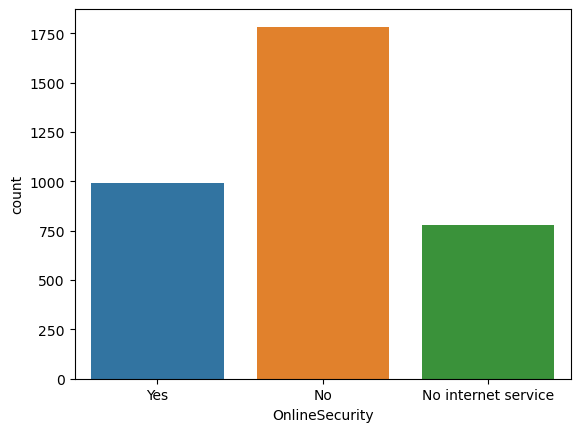

                     OnlineBackup  Ratio
No                           1573 44.248
Yes                          1203 33.840
No internet service           779 21.913


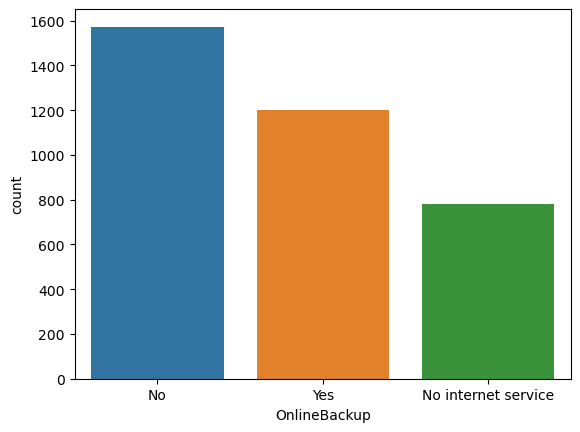

                     DeviceProtection  Ratio
No                               1557 43.797
Yes                              1219 34.290
No internet service               779 21.913


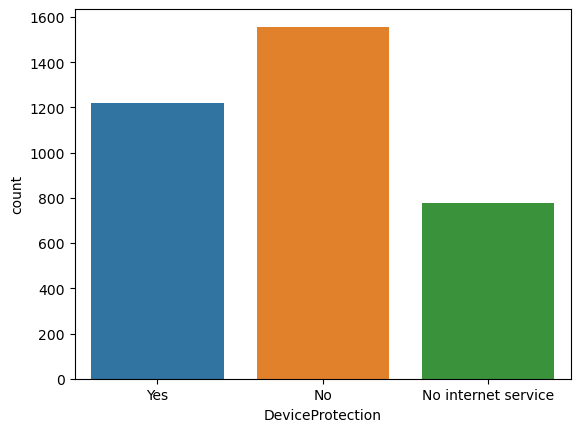

                     TechSupport  Ratio
No                          1759 49.480
Yes                         1017 28.608
No internet service          779 21.913


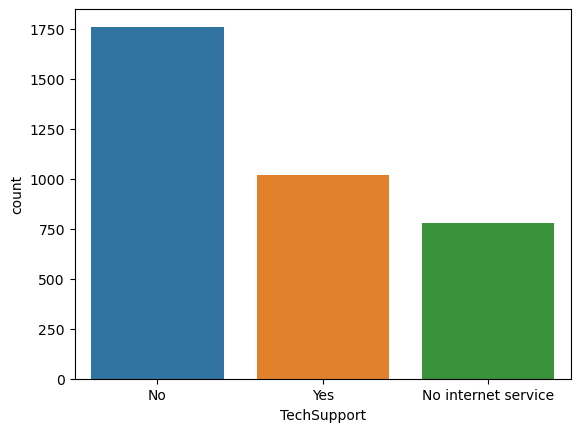

                     StreamingTV  Ratio
No                          1424 40.056
Yes                         1352 38.031
No internet service          779 21.913


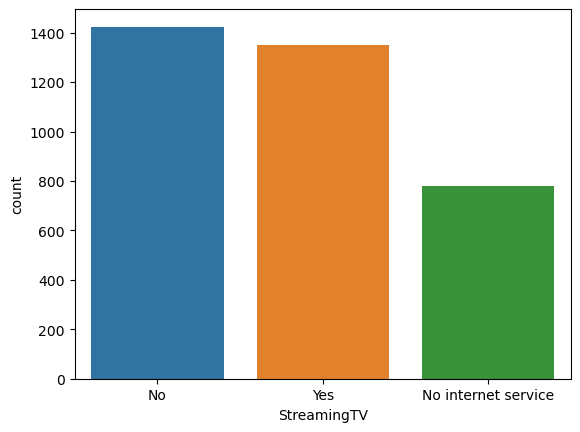

                     StreamingMovies  Ratio
No                              1415 39.803
Yes                             1361 38.284
No internet service              779 21.913


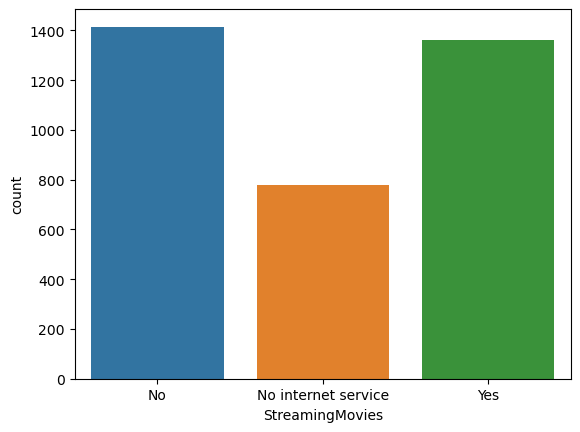

                Contract  Ratio
Month-to-month      1950 54.852
Two year             850 23.910
One year             755 21.238


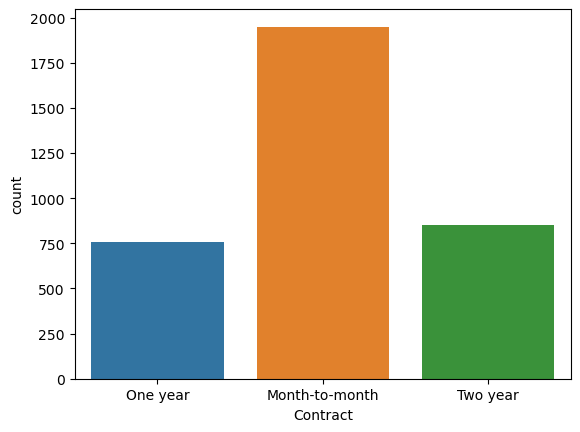

     PaperlessBilling  Ratio
Yes              2085 58.650
No               1470 41.350


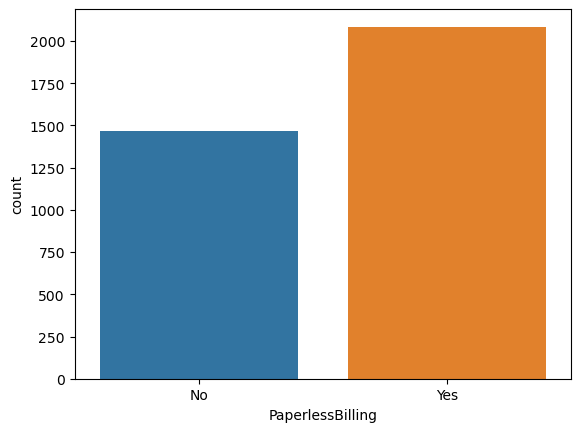

                           PaymentMethod  Ratio
Electronic check                    1195 33.615
Mailed check                         834 23.460
Credit card (automatic)              770 21.660
Bank transfer (automatic)            756 21.266


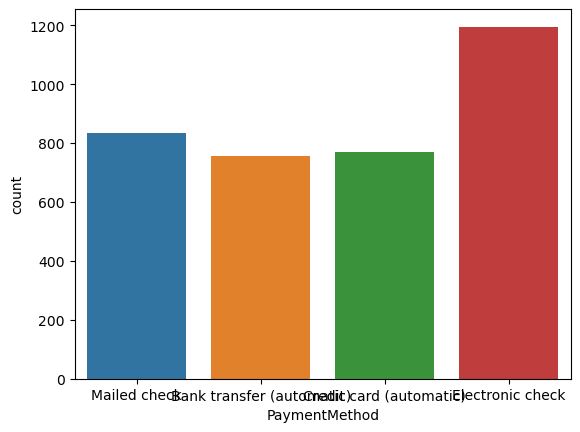

In [24]:
for col in cat_cols:
        print(pd.DataFrame({col: df[col].value_counts(),
                        "Ratio": 100 * df[col].value_counts() / len(df)}))
        sns.countplot(x=df[col], data=df)
        plt.show()

## 3.2 Analysis of Numeric Variables

count   3555.000
mean       0.161
std        0.368
min        0.000
1%         0.000
5%         0.000
25%        0.000
50%        0.000
75%        0.000
95%        1.000
99%        1.000
max        1.000
Name: SeniorCitizen, dtype: float64


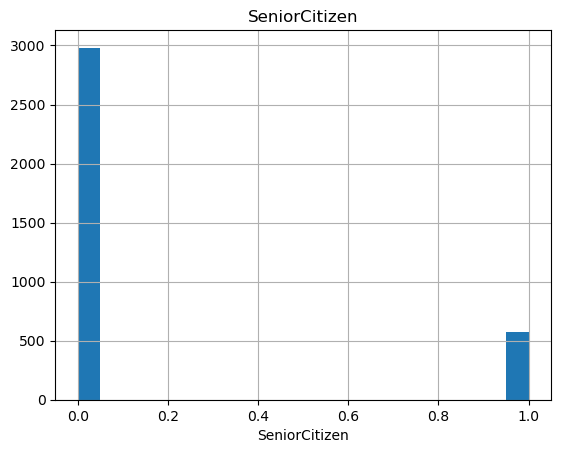

count   3555.000
mean      32.495
std       24.656
min        0.000
1%         1.000
5%         1.000
25%        9.000
50%       29.000
75%       56.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


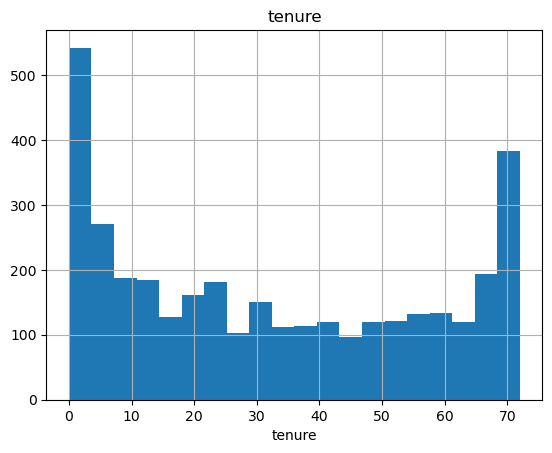

count   3555.000
mean      64.327
std       30.116
min       18.250
1%        19.200
5%        19.650
25%       35.225
50%       70.100
75%       89.875
95%      106.545
99%      114.450
max      118.350
Name: MonthlyCharges, dtype: float64


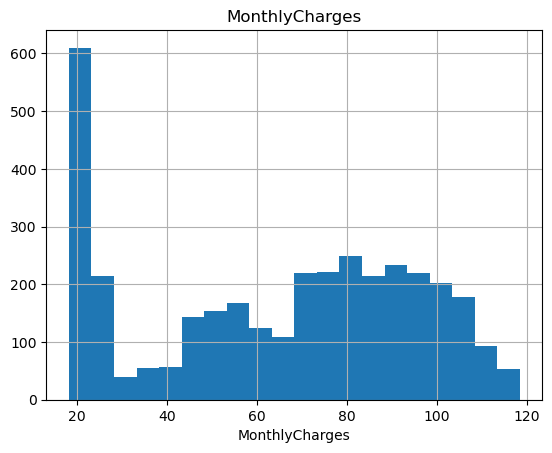

count   3549.000
mean    2283.408
std     2263.101
min       18.800
1%        19.774
5%        45.850
25%      397.000
50%     1404.650
75%     3771.500
95%     6922.720
99%     8019.850
max     8684.800
Name: TotalCharges, dtype: float64


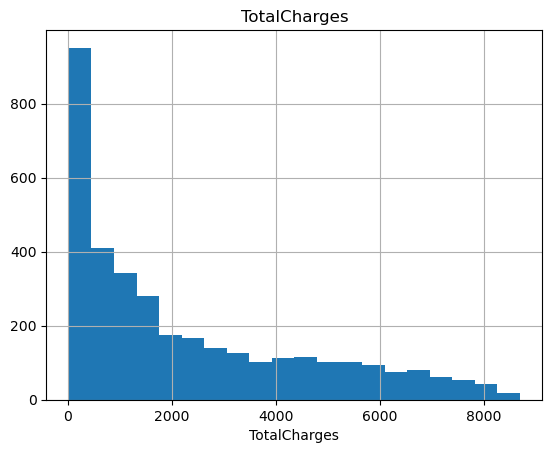

count   3555.000
mean       0.262
std        0.440
min        0.000
1%         0.000
5%         0.000
25%        0.000
50%        0.000
75%        1.000
95%        1.000
99%        1.000
max        1.000
Name: Churn, dtype: float64


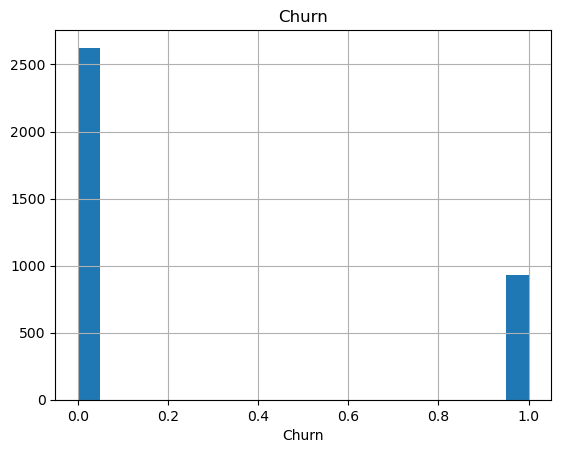

In [25]:
quantiles = [0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99]
for col in num_cols:
    print(df[col].describe(quantiles).T)
    
    df[col].hist(bins=20)
    plt.xlabel(col)
    plt.title(col)
    plt.show()

## Step 4: Target Variable Analysis
### 4.1. Target Analysis of Numeric Variables

In [26]:
for col in num_cols:
    print(df.groupby("Churn").agg({col: "mean"}), end="\n\n\n")

       SeniorCitizen
Churn               
0              0.129
1              0.254


       tenure
Churn        
0      37.290
1      18.963


       MonthlyCharges
Churn                
0              60.877
1              74.067


       TotalCharges
Churn              
0          2517.742
1          1623.492


       Churn
Churn       
0      0.000
1      1.000




### 4.1. Target Analysis of Categorical Variables

In [27]:
for col in cat_cols:
    print(col)
    print(pd.DataFrame({"TARGET_MEAN": df.groupby(col)["Churn"].mean(),
                        "Count": df[col].value_counts(),
                        "Ratio": 100 * df[col].value_counts() / len(df)}).T, end="\n\n\n")

Partner
                  No      Yes
TARGET_MEAN    0.315    0.204
Count       1841.000 1714.000
Ratio         51.786   48.214


Dependents
                  No      Yes
TARGET_MEAN    0.311    0.149
Count       2473.000 1082.000
Ratio         69.564   30.436


PhoneService
                 No      Yes
TARGET_MEAN   0.256    0.262
Count       351.000 3204.000
Ratio         9.873   90.127


MultipleLines
                  No  No phone service      Yes
TARGET_MEAN    0.236             0.256    0.292
Count       1719.000           351.000 1485.000
Ratio         48.354             9.873   41.772


InternetService
                 DSL  Fiber optic      No
TARGET_MEAN    0.195        0.410   0.073
Count       1233.000     1543.000 779.000
Ratio         34.684       43.404  21.913


OnlineSecurity
                  No  No internet service     Yes
TARGET_MEAN    0.415                0.073   0.134
Count       1784.000              779.000 992.000
Ratio         50.183               21.913  27.9

                  #Churn Yüzdesi Yüksek olanlar#
* 'Partner',                 NO 
* 'Dependents',              NO
* 'PhoneService',           ----
* 'MultipleLines',           YES
* 'InternetService',        Fiber
* 'OnlineSecurity',          NO
* 'OnlineBackup',            NO
* 'DeviceProtection',        NO
* 'TechSupport',             NO
* 'StreamingTV',            ----
* 'StreamingMovies',         NO
* 'Contract',                M2M
* 'PaperlessBilling',        YES
* 'PaymentMethod'           Electronic Check

## Step 5: Correlation Analysis

In [28]:
df[num_cols].corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000,0.026,0.207,0.097,0.149
tenure,0.026,1.000,0.255,0.825,-0.327
MonthlyCharges,0.207,0.255,1.000,0.655,0.193
TotalCharges,0.097,0.825,0.655,1.000,-0.174
Churn,0.149,-0.327,0.193,-0.174,1.000


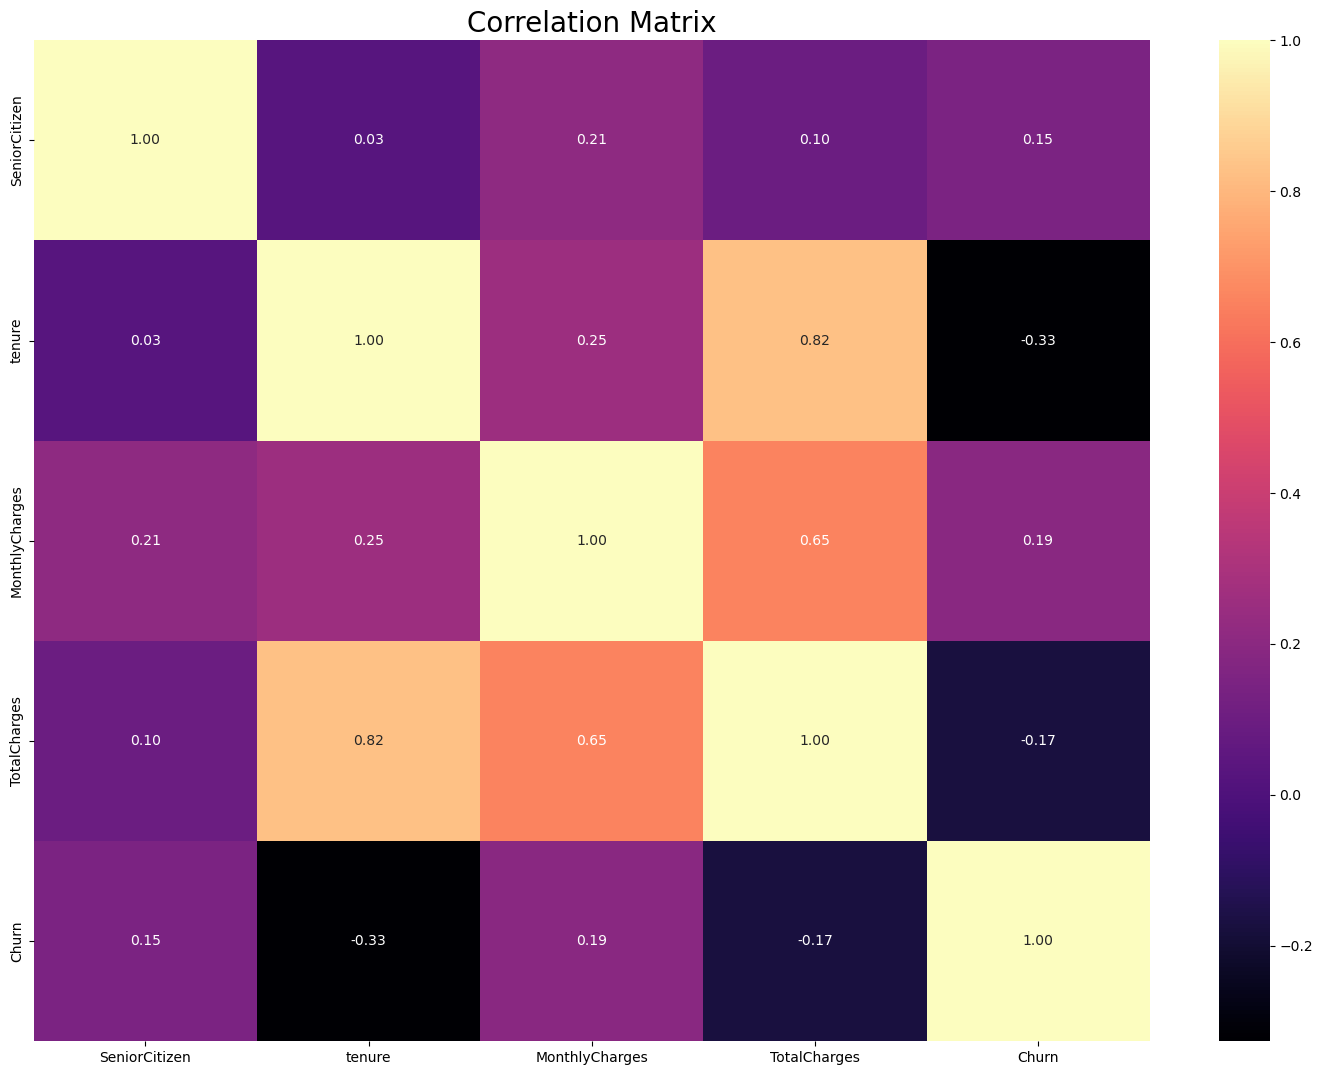

In [29]:
# Korelasyon Matrisi
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# TotalChargers'in aylık ücretler ve tenure ile yüksek korelasyonlu olduğu görülmekte

In [30]:
# Corr by target
df.corrwith(df["Churn"]).sort_values(ascending=False)

Churn             1.000
MonthlyCharges    0.193
SeniorCitizen     0.149
TotalCharges     -0.174
tenure           -0.327
dtype: float64

# TASK 2: FEATURE ENGINEERING


## Step 1: Handling Missing and Outlier Values

In [31]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)
df.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

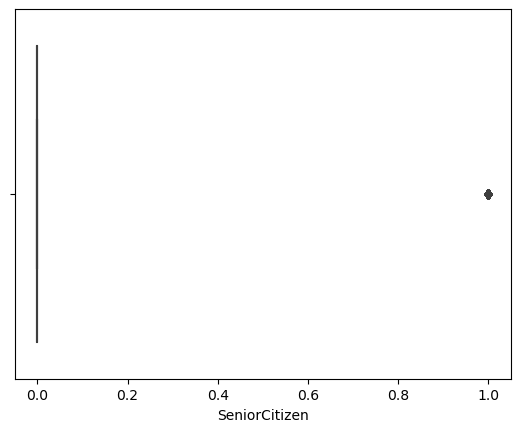

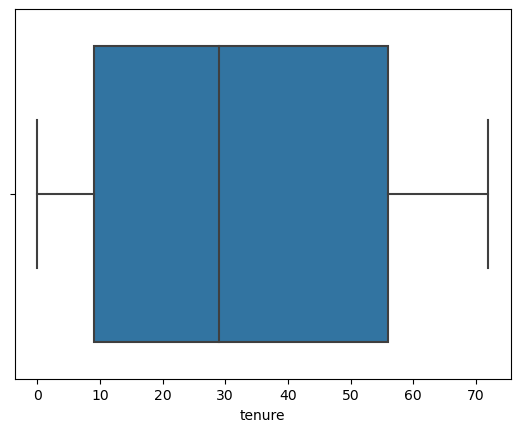

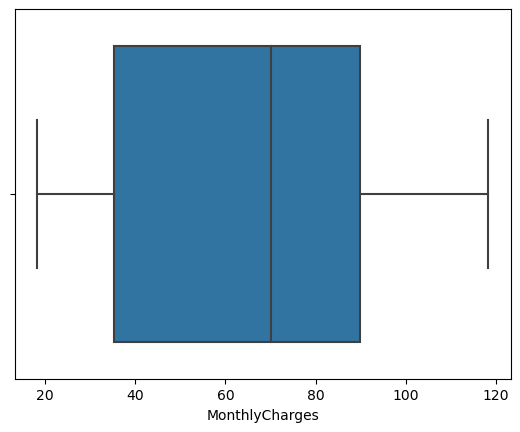

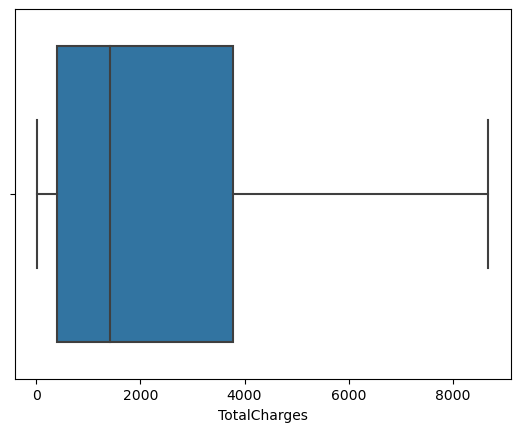

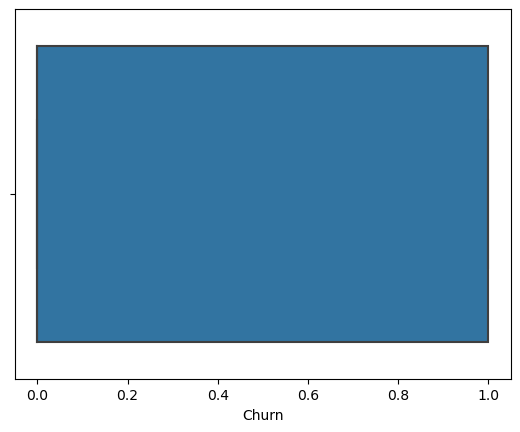

In [32]:
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.show()
    
# Aykırı değer gözlenmiyor.

## 1.2 - Data Visualitions for numerical columns

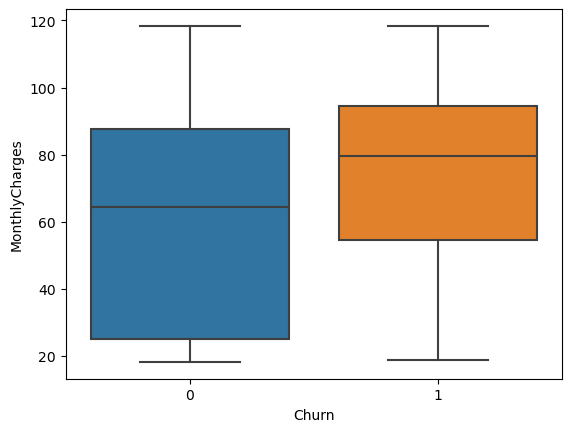

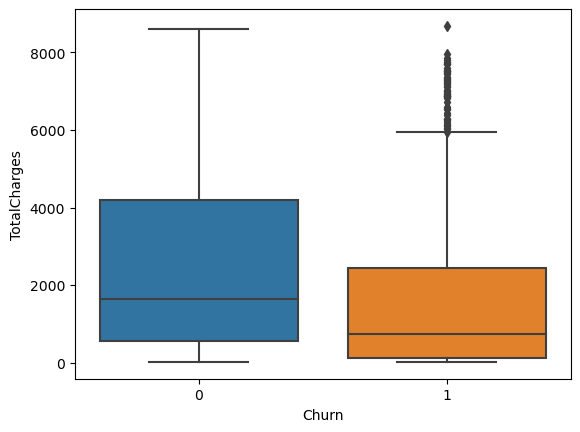

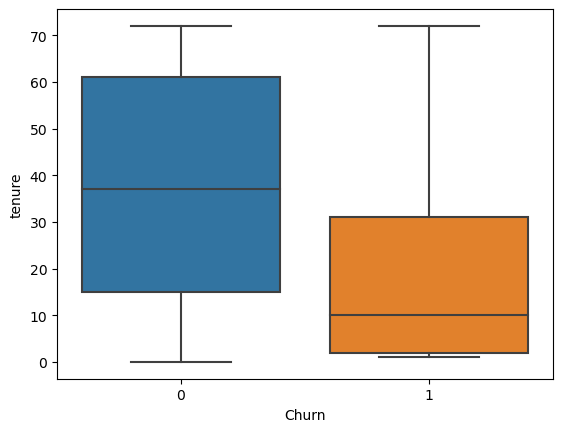

In [33]:
b_cols = ["MonthlyCharges", "TotalCharges" , "tenure"]
for col in b_cols:
    sns.boxplot(data = df, y=df[col],x=df["Churn"])
    plt.show()

In [34]:
dff = df.copy()
cat_cols = [col for col in cat_cols if col not in ["Churn"]]
df[cat_cols].head()

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
1,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
6,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic)
9,No,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic)


## Step 2: Encoding 
### Base Model

In [35]:
# Encoding
dff = pd.get_dummies(dff, columns=cat_cols, drop_first=True)
dff.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,0,34,56.950,1889.500,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.850,108.150,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.300,1840.750,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
6,0,22,89.100,1949.400,0,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0
9,0,62,56.150,3487.950,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [36]:
y = dff["Churn"]
X = dff.drop(["Churn"], axis=1) #,"customerID"

In [37]:
#train_test_split(X, y, test_size=0.30, random_state=17)
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [38]:
print("Base datanın tamamı" + str(dff.shape) + "\n\n" + 
      " X_train data" + str(X_train.shape) + "\n\n" + 
      " X_test data" + str(X_test.shape) + "\n\n" + 
      " y_train data" + str(y_train.shape) + "\n\n" + 
      " y_test data" + str(y_test.shape))

Base datanın tamamı(3555, 30)

 X_train data(2488, 29)

 X_test data(1067, 29)

 y_train data(2488,)

 y_test data(1067,)


In [39]:
catboost_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train, y_train)

In [40]:
y_pred = catboost_model.predict(X_test)

In [41]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(y_pred,y_test),4)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 4)}")
print(f"F1: {round(f1_score(y_pred,y_test), 4)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 4)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.8069
Recall: 0.6493
Precision: 0.5093
F1: 0.5708
Auc: 0.7475
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       856
           1       0.51      0.65      0.57       211

    accuracy                           0.81      1067
   macro avg       0.71      0.75      0.72      1067
weighted avg       0.83      0.81      0.82      1067



In [42]:
#Modelin değerlerini incelediğimizde accuracy ve recall iyi olsa da, precision vasat bir değer.

<Axes: >

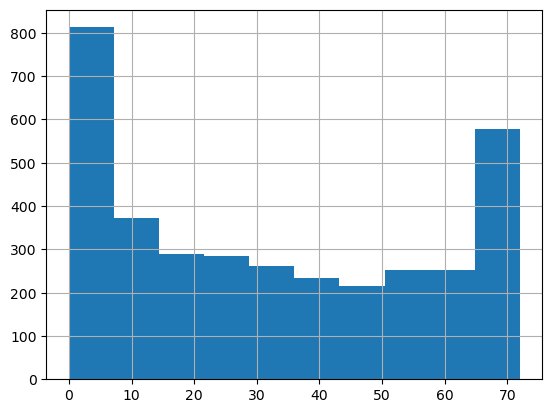

In [43]:
df["tenure"].hist()

## Step 3: Create New Variables

In [44]:
# Tenure  değişkeninden yıllık kategorik değişken oluşturma
df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"

In [45]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2-3 Year
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,0-1 Year
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,3-4 Year
6,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.100,1949.400,0,1-2 Year
9,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.150,3487.950,0,5-6 Year


In [46]:
# Kontratı 1 veya 2 yıllık müşterileri Engaged olarak belirtme
df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)
# Herhangi bir destek, yedek veya koruma almayan kişiler
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)
# Aylık sözleşmesi bulunan ve genç olan müşteriler
df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)
# Kişinin toplam aldığı servis sayısı
df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)
# Herhangi bir streaming hizmeti alan kişiler
df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)
# Kişi otomatik ödeme yapıyor mu?
df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)
# ortalama aylık ödeme
df["NEW_AVG_Charges"] = df["TotalCharges"] / (df["tenure"] + 1)
# Güncel Fiyatın ortalama fiyata göre artışı
df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]
# Servis başına ücret
df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)

In [47]:
df["PaymentMethod"].value_counts()

Electronic check             1195
Mailed check                  834
Credit card (automatic)       770
Bank transfer (automatic)     756
Name: PaymentMethod, dtype: int64

#### New variables tag with Cem_

In [48]:
# Kişi elektronik ve dijital ödeme yapıyor mu?
df["CEM_FLAG_AutoPayment"] = df.apply(lambda x: 1 if (x["PaymentMethod"] == "Electronic check") and (x["PaperlessBilling"] == "Yes")  else 0, axis=1)

In [49]:
# ödemeler oranı
df["Cem_Charges"] = df["TotalCharges"] / df["MonthlyCharges"]
# tenurun ortalama tenure oranı
df["Cem_Tenure"] = df["tenure"] / df["tenure"].mean()
# ödemelere bağlı tenure değişkeni
df["Cem_TenureCharges"] = df["Cem_Charges"] / df["Cem_Tenure"]
# ödeme oranına bağlı hizmetten yararlanma oranı değişkeni
df["Cem_TenureCharges"] = df["Cem_Charges"] / df['NEW_TotalServices']

In [50]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee,CEM_FLAG_AutoPayment,Cem_Charges,Cem_Tenure,Cem_TenureCharges
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2-3 Year,1,1,0,3,0,0,53.986,0.948,14.238,0,33.178,1.046,11.059
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,0-1 Year,0,1,1,3,0,0,36.050,0.669,13.463,0,2.008,0.062,0.669
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1,1,0,3,0,1,40.016,0.946,10.575,0,43.517,1.385,14.506
6,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.100,1949.400,0,1-2 Year,0,1,1,3,1,1,84.757,0.951,22.275,0,21.879,0.677,7.293
9,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.150,3487.950,0,5-6 Year,1,1,0,3,0,1,55.364,0.986,14.037,0,62.118,1.908,20.706


In [51]:
df.nunique()

SeniorCitizen                2
Partner                      2
Dependents                   2
tenure                      73
PhoneService                 2
MultipleLines                3
InternetService              3
OnlineSecurity               3
OnlineBackup                 3
DeviceProtection             3
TechSupport                  3
StreamingTV                  3
StreamingMovies              3
Contract                     3
PaperlessBilling             2
PaymentMethod                4
MonthlyCharges            1286
TotalCharges              3375
Churn                        2
NEW_TENURE_YEAR              6
NEW_Engaged                  2
NEW_noProt                   2
NEW_Young_Not_Engaged        2
NEW_TotalServices            8
NEW_FLAG_ANY_STREAMING       2
NEW_FLAG_AutoPayment         2
NEW_AVG_Charges           3412
NEW_Increase              3227
NEW_AVG_Service_Fee       1729
CEM_FLAG_AutoPayment         2
Cem_Charges               3227
Cem_Tenure                  73
Cem_Tenu

In [52]:
df.shape

(3555, 33)

## Step 4: Encoding

In [53]:
# Yeni üretilen değişkenler için cat, num ayırımını tekrar yapalım.
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
num_cols = [col for col in df.columns if df[col].dtypes != "O"]

In [54]:
cat_cols

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'NEW_TENURE_YEAR']

In [55]:
num_cols

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'NEW_Engaged',
 'NEW_noProt',
 'NEW_Young_Not_Engaged',
 'NEW_TotalServices',
 'NEW_FLAG_ANY_STREAMING',
 'NEW_FLAG_AutoPayment',
 'NEW_AVG_Charges',
 'NEW_Increase',
 'NEW_AVG_Service_Fee',
 'CEM_FLAG_AutoPayment',
 'Cem_Charges',
 'Cem_Tenure',
 'Cem_TenureCharges']

In [56]:
# Artık binary kolonlarımızda var
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [57]:
# Binary kolonlar label encoder yapacağız.
labelencoder = LabelEncoder()

In [58]:
for col in binary_cols:
    labelencoder = LabelEncoder()
    df[col] = labelencoder.fit_transform(df[col])

In [59]:
# Kategorik kolonlar için one hot encoder uygulayacağız.
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]
cat_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'NEW_TENURE_YEAR']

In [60]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [61]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee,CEM_FLAG_AutoPayment,Cem_Charges,Cem_Tenure,Cem_TenureCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year
1,0,0,0,34,1,0,56.950,1889.500,0,1,1,0,3,0,0,53.986,0.948,14.238,0,33.178,1.046,11.059,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,0,0,0,2,1,1,53.850,108.150,1,0,1,1,3,0,0,36.050,0.669,13.463,0,2.008,0.062,0.669,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,45,0,0,42.300,1840.750,0,1,1,0,3,0,1,40.016,0.946,10.575,0,43.517,1.385,14.506,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
6,0,0,1,22,1,1,89.100,1949.400,0,0,1,1,3,1,1,84.757,0.951,22.275,0,21.879,0.677,7.293,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
9,0,0,1,62,1,0,56.150,3487.950,0,1,1,0,3,0,1,55.364,0.986,14.037,0,62.118,1.908,20.706,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


## Step 4: Model Building

In [62]:
# Eksik Değerler
na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
print(na_columns)

[]


In [63]:
##################################
# Outliers Analysis 
##################################

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [64]:
# Aykırı Değer Analizi ve Baskılama İşlemi
for col in num_cols:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

SeniorCitizen False
tenure False
MonthlyCharges False
TotalCharges False
Churn False
NEW_Engaged False
NEW_noProt False
NEW_Young_Not_Engaged False
NEW_TotalServices False
NEW_FLAG_ANY_STREAMING False
NEW_FLAG_AutoPayment False
NEW_AVG_Charges True
NEW_Increase True
NEW_AVG_Service_Fee False
CEM_FLAG_AutoPayment False
Cem_Charges False
Cem_Tenure False
Cem_TenureCharges True


In [65]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee,CEM_FLAG_AutoPayment,Cem_Charges,Cem_Tenure,Cem_TenureCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year
1,0,0,0,34,1,0,56.950,1889.500,0,1,1,0,3,0,0,53.986,0.948,14.238,0,33.178,1.046,11.059,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,0,0,0,2,1,1,53.850,108.150,1,0,1,1,3,0,0,36.050,0.669,13.463,0,2.008,0.062,0.669,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,45,0,0,42.300,1840.750,0,1,1,0,3,0,1,40.016,0.946,10.575,0,43.517,1.385,14.506,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
6,0,0,1,22,1,1,89.100,1949.400,0,0,1,1,3,1,1,84.757,0.951,22.275,0,21.879,0.677,7.293,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
9,0,0,1,62,1,0,56.150,3487.950,0,1,1,0,3,0,1,55.364,0.986,14.037,0,62.118,1.908,20.706,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [66]:
dff = df.copy()
#dff = dff.drop("customerID", axis=1)
dff.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee,CEM_FLAG_AutoPayment,Cem_Charges,Cem_Tenure,Cem_TenureCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year
1,0,0,0,34,1,0,56.950,1889.500,0,1,1,0,3,0,0,53.986,0.948,14.238,0,33.178,1.046,11.059,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,0,0,0,2,1,1,53.850,108.150,1,0,1,1,3,0,0,36.050,0.669,13.463,0,2.008,0.062,0.669,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,45,0,0,42.300,1840.750,0,1,1,0,3,0,1,40.016,0.946,10.575,0,43.517,1.385,14.506,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
6,0,0,1,22,1,1,89.100,1949.400,0,0,1,1,3,1,1,84.757,0.951,22.275,0,21.879,0.677,7.293,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
9,0,0,1,62,1,0,56.150,3487.950,0,1,1,0,3,0,1,55.364,0.986,14.037,0,62.118,1.908,20.706,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [67]:
y = dff["Churn"]
X = dff.drop(["Churn"], axis=1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

# catboost_model, random forest, cart, logistic regression implementations

In [69]:
catboost_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train, y_train)
y_pred_cbc = catboost_model.predict(X_test)

In [70]:
print(f"Accuracy: {round(accuracy_score(y_pred_cbc, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred_cbc,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred_cbc,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred_cbc,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred_cbc,y_test), 2)}")
print(classification_report(y_pred_cbc, y_test))

Accuracy: 0.8
Recall: 0.63
Precision: 0.48
F1: 0.55
Auc: 0.74
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       863
           1       0.48      0.63      0.55       204

    accuracy                           0.80      1067
   macro avg       0.69      0.74      0.71      1067
weighted avg       0.82      0.80      0.81      1067



In [71]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

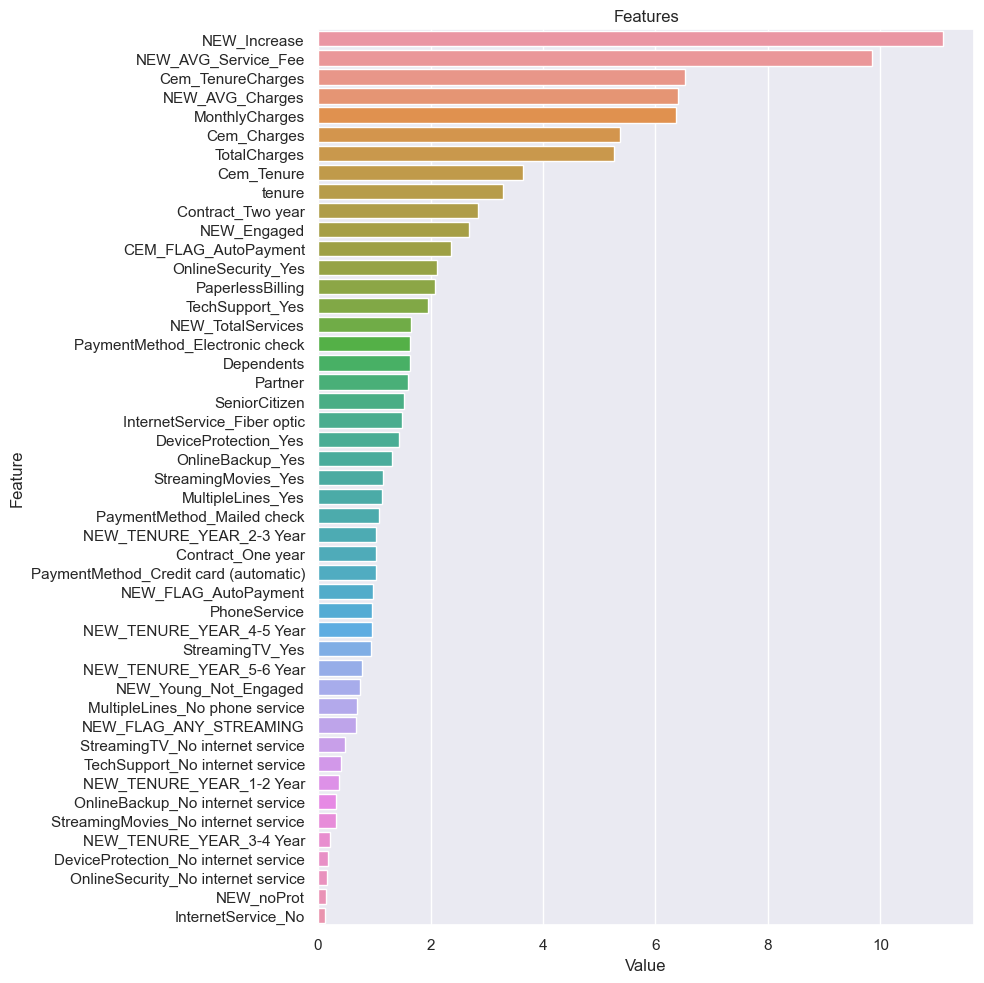

In [72]:
plot_importance(catboost_model, X)

In [73]:
catboost_model.feature_importances_

array([ 1.53571997,  1.6016499 ,  1.62683431,  3.28214684,  0.95742166,
        2.07093771,  6.35998907,  5.26567995,  2.69201496,  0.13993163,
        0.74729398,  1.64453855,  0.68014613,  0.97073662,  6.39994807,
       11.11009295,  9.85468781,  2.37194963,  5.36235316,  3.64612977,
        6.52304697,  0.6929511 ,  1.14464041,  1.48431603,  0.11673734,
        0.15548084,  2.12104841,  0.32680291,  1.30676801,  0.17737366,
        1.43616472,  0.40513682,  1.95362571,  0.477434  ,  0.93436084,
        0.31384044,  1.14839967,  1.03421931,  2.84039235,  1.02299327,
        1.62808068,  1.08117759,  0.368228  ,  1.03562496,  0.21415874,
        0.95296872,  0.78382586])

In [74]:
feature_imp = pd.DataFrame({'Value': catboost_model.feature_importances_, 'Feature': X.columns})
feature_imp.sort_values(by="Value",ascending=False)

,Value,Feature
15,11.110,NEW_Increase
16,9.855,NEW_AVG_Service_Fee
20,6.523,Cem_TenureCharges
14,6.400,NEW_AVG_Charges
6,6.360,MonthlyCharges
18,5.362,Cem_Charges
7,5.266,TotalCharges
19,3.646,Cem_Tenure
3,3.282,tenure
38,2.840,Contract_Two year


### Random Forests 

In [75]:
rf_model = RandomForestClassifier(random_state=17).fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [76]:
print(f"Accuracy: {round(accuracy_score(y_pred_rf, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred_rf,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred_rf,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred_rf,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred_rf,y_test), 2)}")
print(classification_report(y_pred_rf, y_test))

Accuracy: 0.79
Recall: 0.6
Precision: 0.46
F1: 0.53
Auc: 0.72
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       860
           1       0.46      0.60      0.53       207

    accuracy                           0.79      1067
   macro avg       0.68      0.72      0.69      1067
weighted avg       0.81      0.79      0.80      1067



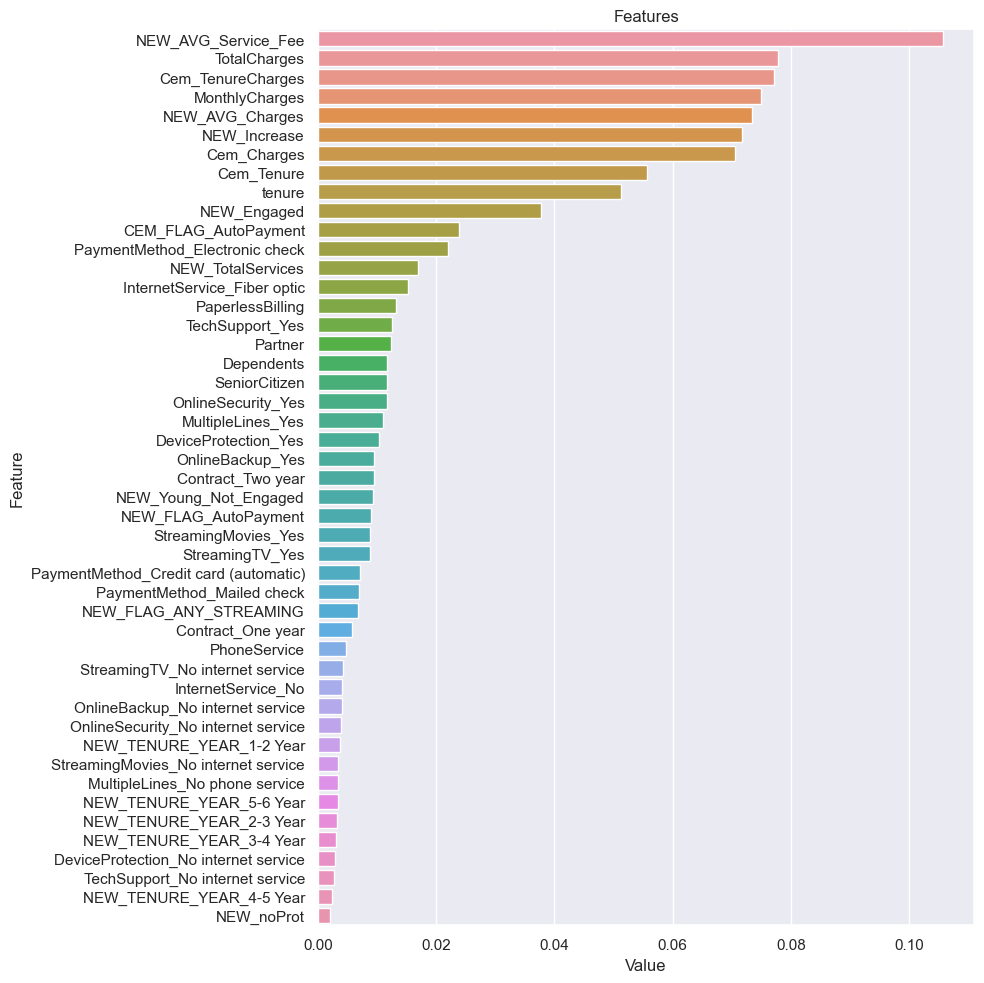

In [77]:
plot_importance(rf_model, X)

### CART

In [78]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)
y_pred_cart = cart_model.predict(X_test)

In [79]:
print(f"Accuracy: {round(accuracy_score(y_pred_cart, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred_cart,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred_cart,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred_cart,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred_cart,y_test), 2)}")
print(classification_report(y_pred_cart, y_test))

Accuracy: 0.73
Recall: 0.47
Precision: 0.5
F1: 0.49
Auc: 0.65
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       782
           1       0.50      0.47      0.49       285

    accuracy                           0.73      1067
   macro avg       0.66      0.65      0.65      1067
weighted avg       0.73      0.73      0.73      1067



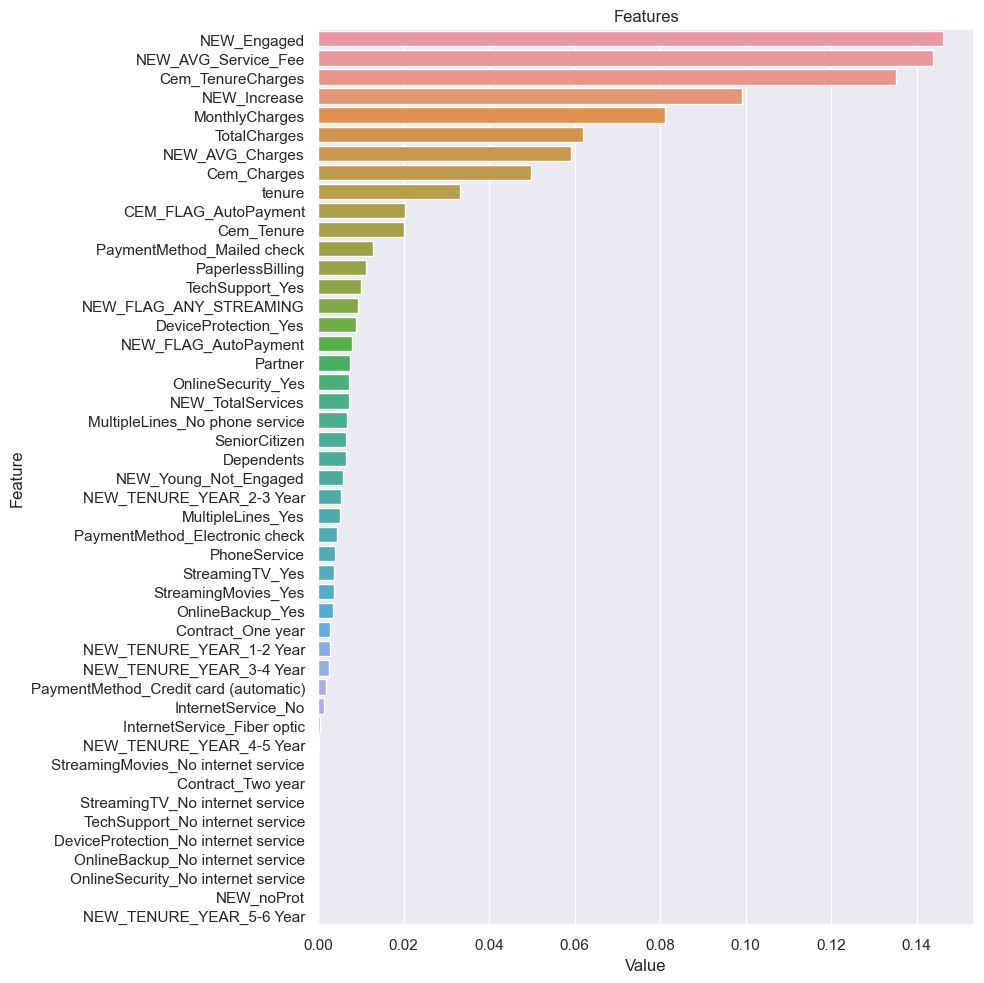

In [80]:
plot_importance(cart_model, X)

###  Hyperparameter optimization
## Random Forests HPO

In [81]:
rf_model = RandomForestClassifier(random_state=17)

rf_params = {"max_depth": [8, 10, None],
             "max_features": [15, "auto"],
             "min_samples_split": [2,10],
             "n_estimators": [100]}


In [82]:
rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [83]:
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 15,
 'min_samples_split': 10,
 'n_estimators': 100}

In [84]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)

In [85]:
y_pred_rff = rf_final.predict(X_test)

In [86]:
print(f"Accuracy: {round(accuracy_score(y_pred_rff, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred_rff,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred_rff,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred_rff,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred_rff,y_test), 2)}")
print(classification_report(y_pred_rff, y_test))

Accuracy: 0.93
Recall: 0.91
Precision: 0.81
F1: 0.86
Auc: 0.93
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       827
           1       0.81      0.91      0.86       240

    accuracy                           0.93      1067
   macro avg       0.89      0.93      0.91      1067
weighted avg       0.94      0.93      0.93      1067



In [87]:
from sklearn.metrics import confusion_matrix
cm_rfhpo = confusion_matrix(y_test, y_pred_rff)
print(cm_rfhpo)

[[777  21]
 [ 50 219]]


### Logistic Regression

In [88]:
log_reg_model = LogisticRegression(random_state = 17).fit(X_train, y_train)
y_pred_log = log_reg_model.predict(X_test)

In [89]:
print(f"Accuracy: {round(accuracy_score(y_pred_log, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred_log,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred_log,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred_log,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred_log,y_test), 2)}")
print(classification_report(y_pred_log, y_test))

Accuracy: 0.8
Recall: 0.67
Precision: 0.42
F1: 0.52
Auc: 0.75
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       898
           1       0.42      0.67      0.52       169

    accuracy                           0.80      1067
   macro avg       0.67      0.75      0.70      1067
weighted avg       0.85      0.80      0.82      1067



In [90]:
from sklearn.metrics import confusion_matrix
logreg_cm = confusion_matrix(y_test, y_pred_log)
print(logreg_cm)

[[742  56]
 [156 113]]


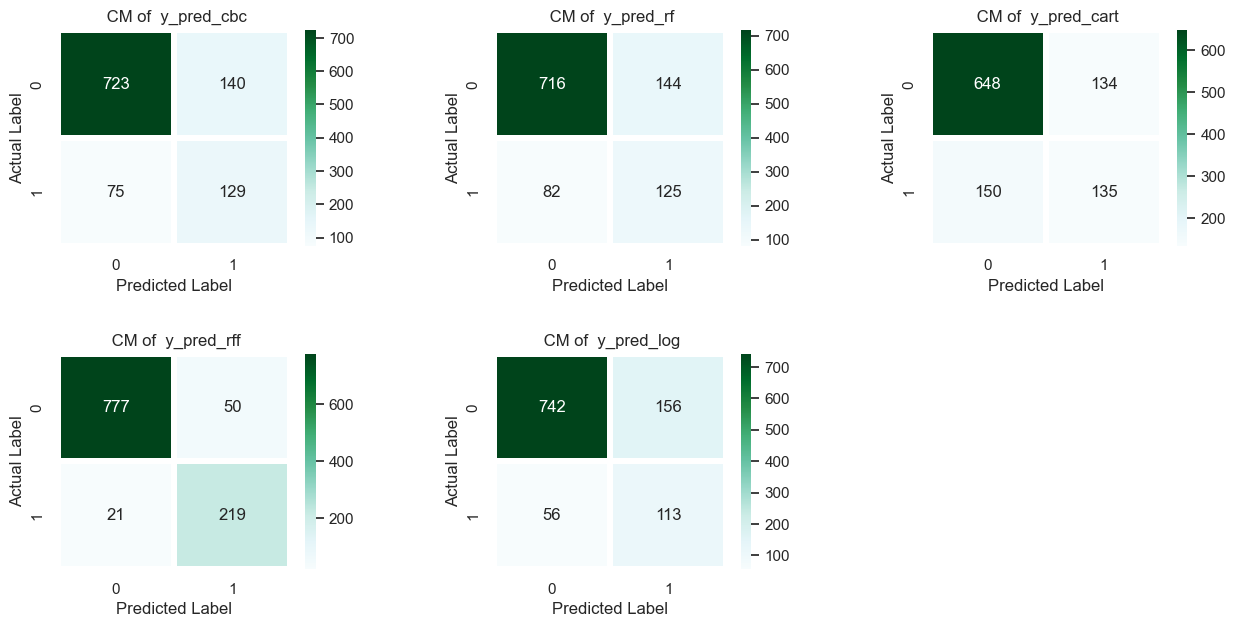

In [91]:
models_predictions=[y_pred_cbc,y_pred_rf,y_pred_cart, y_pred_rff, y_pred_log]
model={1:'y_pred_cbc',2:'y_pred_rf',3:'y_pred_cart',4:'y_pred_rff',5:'y_pred_log'}


plt.figure(figsize=(15,7))
for i,y_pred in enumerate(models_predictions,1) :
    
    cm = confusion_matrix(y_pred,y_test)
    
    plt.subplot(2,3,i)
    sns.heatmap(cm,cmap='BuGn',linewidth=3,fmt='',annot=True,
                xticklabels=[0,1],
                yticklabels=[0,1])
    
    
    plt.title(' CM of  '+ model[i])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)


## The optimal Recall value was achieved based on the parameters obtained through Hyperparameter Optimization (HPO) for the Random Forest model. 
# Therefore, the selected model is the Random Forest tuned with HPO (y_pref_rff).

In [92]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)
y_pred = rf_final.predict(X_test)
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")

Recall: 0.91


In [93]:
from sklearn.metrics import confusion_matrix
cm_rfhpo = confusion_matrix(y_test, y_pred)
print(cm_rfhpo)

[[777  21]
 [ 50 219]]
